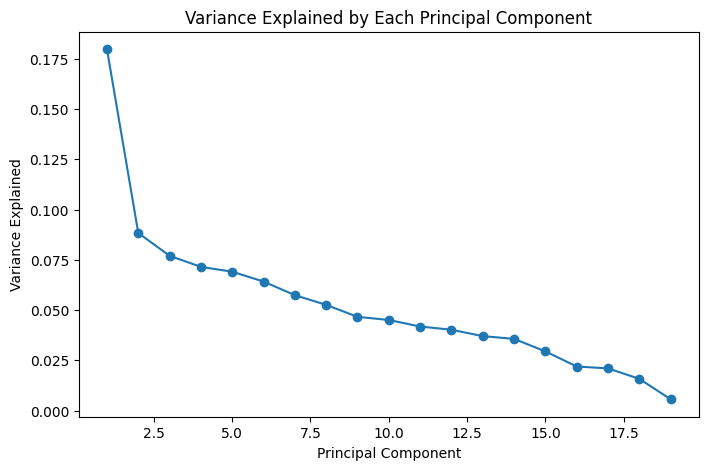

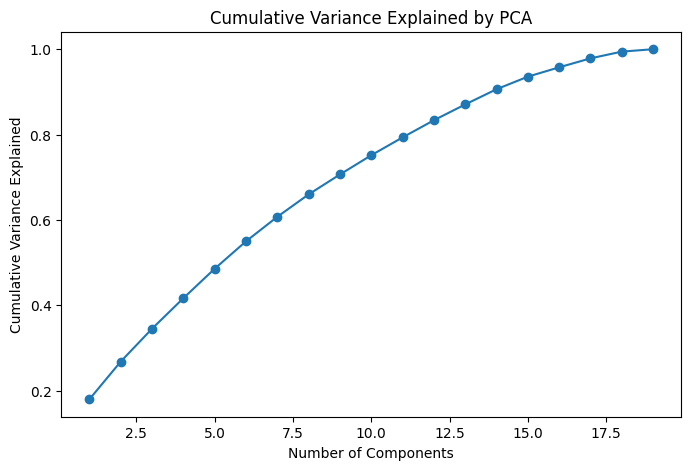

Optimal number of components to keep (≈95% variance): 16
✅ PCA-transformed dataset saved at: data/pca_transformed.csv


In [1]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 2. Load the cleaned dataset
df = pd.read_csv("../data/cleaned.csv")

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# 3. Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# 4. Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plot explained variance per component
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Variance Explained by Each Principal Component")
plt.show()

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Variance Explained by PCA")
plt.show()

# 5. Keep only top N components (e.g., enough to explain ~95% variance)
n_components = (cumulative_variance < 0.95).sum() + 1
print(f"Optimal number of components to keep (≈95% variance): {n_components}")

pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)

# 6. Save the reduced dataset
reduced_df = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(n_components)])
reduced_df["target"] = y.values

reduced_df.to_csv("../data/pca_transformed.csv", index=False)
print("✅ PCA-transformed dataset saved at: data/pca_transformed.csv")
